<h3><strong>Covid-19 Image Classification</strong></h3>

<p>Author: Mesuga, Reymond R.</p>

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import shutil
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import opendatasets as od
import torchvision.transforms as tt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset_url = "https://www.kaggle.com/unaissait/curated-chest-xray-image-dataset-for-covid19"

In [4]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mesugareymond
Your Kaggle Key: ··········


  0%|          | 12.0M/3.49G [00:00<00:29, 125MB/s]

100%|██████████| 3.49G/3.49G [01:01<00:00, 60.9MB/s]


In [5]:
data_dir = "/content/curated-chest-xray-image-dataset-for-covid19/Curated X-Ray Dataset"
shutil.rmtree(data_dir + "/Pneumonia-Viral")
shutil.rmtree(data_dir + "/Pneumonia-Bacterial")
os.listdir(data_dir)

['Normal', 'COVID-19']

Converting Images into Tensors

In [6]:
dataset = ImageFolder(data_dir, tt.Compose([tt.Resize(240), tt.CenterCrop(240), tt.ToTensor()]))
len(dataset)

4551

Checking some Image Tensors

In [7]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 240, 240]) 0


tensor([[[0.1569, 0.1216, 0.1176,  ..., 0.0000, 0.0000, 0.0000],
         [0.2549, 0.1922, 0.1451,  ..., 0.0039, 0.0000, 0.0000],
         [0.3373, 0.2941, 0.2471,  ..., 0.0275, 0.0118, 0.0039],
         ...,
         [0.3529, 0.3725, 0.3882,  ..., 0.3294, 0.2980, 0.2941],
         [0.3490, 0.3686, 0.3843,  ..., 0.3137, 0.2902, 0.2902],
         [0.3529, 0.3608, 0.3765,  ..., 0.3059, 0.2863, 0.2902]],

        [[0.1569, 0.1216, 0.1176,  ..., 0.0000, 0.0000, 0.0000],
         [0.2549, 0.1922, 0.1451,  ..., 0.0039, 0.0000, 0.0000],
         [0.3373, 0.2941, 0.2471,  ..., 0.0275, 0.0118, 0.0039],
         ...,
         [0.3529, 0.3725, 0.3882,  ..., 0.3294, 0.2980, 0.2941],
         [0.3490, 0.3686, 0.3843,  ..., 0.3137, 0.2902, 0.2902],
         [0.3529, 0.3608, 0.3765,  ..., 0.3059, 0.2863, 0.2902]],

        [[0.1569, 0.1216, 0.1176,  ..., 0.0000, 0.0000, 0.0000],
         [0.2549, 0.1922, 0.1451,  ..., 0.0039, 0.0000, 0.0000],
         [0.3373, 0.2941, 0.2471,  ..., 0.0275, 0.0118, 0.

In [8]:
img, label = dataset[1]
print(img.shape, label)
img

torch.Size([3, 240, 240]) 0


tensor([[[0.6275, 0.6549, 0.6588,  ..., 0.0000, 0.0000, 0.0000],
         [0.6510, 0.6745, 0.6784,  ..., 0.0000, 0.0000, 0.0000],
         [0.6667, 0.6863, 0.7020,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.6275, 0.6549, 0.6588,  ..., 0.0000, 0.0000, 0.0000],
         [0.6510, 0.6745, 0.6784,  ..., 0.0000, 0.0000, 0.0000],
         [0.6667, 0.6863, 0.7020,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.6275, 0.6549, 0.6588,  ..., 0.0000, 0.0000, 0.0000],
         [0.6510, 0.6745, 0.6784,  ..., 0.0000, 0.0000, 0.0000],
         [0.6667, 0.6863, 0.7020,  ..., 0.0000, 0.0000, 0.

Checking what the image looks like

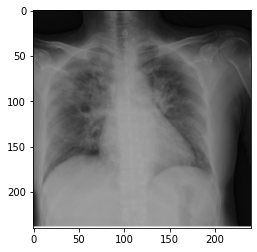

In [9]:
img, label = dataset[8]

plt.imshow(img.permute((1,2,0)))

Splitting the Dataset

In [10]:
random_seed = 42
torch.manual_seed(random_seed);

val_size = 455
train_size = len(dataset) - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(4096, 455)

Creating the Data Loaders

In [11]:
from torch.utils.data.dataloader import DataLoader
batch_size = 16

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Visualizing Images in a Batch

In [12]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


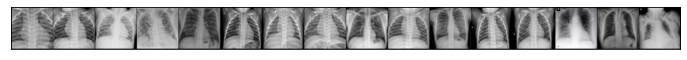

In [13]:
show_batch(train_dl)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


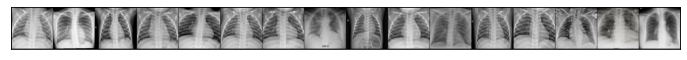

In [14]:
show_batch(val_dl)

GPU Utilities

In [15]:
import torch
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [16]:
torch.cuda.is_available()

True

In [17]:
device = get_default_device()
device

device(type='cuda')

In [18]:
img.device

device(type='cpu')

In [19]:
img_gpu = to_device(img, device)
img_gpu.device

device(type='cuda', index=0)

In [20]:
train_dl = DeviceDataLoader(train_dl, device )
val_dl = DeviceDataLoader(val_dl, device)
print(train_dl.device, val_dl.device)

cuda cuda


Model and Training Utilities

In [21]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        "calculate loss for a batch of training data"
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        "calculate loss & accuracy for a batch of validation data"
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [22]:

@torch.no_grad()
def evaluate(model, val_loader):
    "Evaluate the models performance on the validation set"
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Model (ResNet9)


In [23]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # Input: 10 x x 3 x 224 x 224
        self.conv1 = conv_block(in_channels, 224) #Input: 10 x 224 x 224 x 224
        self.conv2 = conv_block(224, 128, pool=True) #Input: 10 x 128 x 112 x 112, feature map is reduced to 16 x 16 because pool is set to true
        self.res1 = nn.Sequential(conv_block(128, 128), #Input: 10 x  128 x 112 x 112
                                  conv_block(128, 128)) # 10 x 128 x 112 x 112
        
        self.conv3 = conv_block(128, 256, pool=True) # 10 x 256 x 28 x 28
        self.conv4 = conv_block(256, 512, pool=True) # 10 x 512 x 14 x 14
        self.res2 = nn.Sequential(conv_block(512, 512), # 10 x 512 x 14 x 14
                                  conv_block(512, 512)) # 10 x 512 x 14 x 14
        
        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # 10 x 512 x 1 x 1
                                        nn.Flatten(), # 10 x 512
                                        nn.Dropout(0.2), # . Dropout makes the model learn by analyzing relationships not by specific values
                                        nn.Linear(512, num_classes))   
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [24]:
model = to_device(ResNet9(3, len(train_ds)), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 224, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(224, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(224, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace

In [25]:

# Checking if the weight of a layer is on cude
model.conv1[0].weight.device

device(type='cuda', index=0)

In [26]:
for batch in train_dl:
  images, label = batch
  print("images.shape",images.shape)
  print("images.device",images.device)
  preds = model(images)
  print("preds.shape", preds.shape)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape torch.Size([16, 3, 240, 240])
images.device cuda:0
preds.shape torch.Size([16, 4096])


In [27]:
history = [evaluate(model, val_dl)]
history

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.0, 'val_loss': 8.321183204650879}]

In [28]:
history += fit(5, 0.0001, model, train_dl, val_dl, torch.optim.Adam)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 0.3313, val_loss: 0.0606, val_acc: 0.9843
Epoch [1], train_loss: 0.0733, val_loss: 0.0333, val_acc: 0.9828
Epoch [2], train_loss: 0.0364, val_loss: 0.0338, val_acc: 0.9871
Epoch [3], train_loss: 0.0279, val_loss: 0.0380, val_acc: 0.9892
Epoch [4], train_loss: 0.0218, val_loss: 0.0422, val_acc: 0.9892


In [29]:
history += fit(5, 0.0001, model, train_dl, val_dl, torch.optim.Adam)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 0.0596, val_loss: 0.0378, val_acc: 0.9892
Epoch [1], train_loss: 0.0542, val_loss: 0.0402, val_acc: 0.9935
Epoch [2], train_loss: 0.0186, val_loss: 0.0455, val_acc: 0.9828
Epoch [3], train_loss: 0.0248, val_loss: 0.0338, val_acc: 0.9914
Epoch [4], train_loss: 0.0192, val_loss: 0.0330, val_acc: 0.9914


In [30]:
history += fit(5, 0.0001, model, train_dl, val_dl, torch.optim.Adam)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 0.0261, val_loss: 0.0368, val_acc: 0.9935
Epoch [1], train_loss: 0.0223, val_loss: 0.0730, val_acc: 0.9806
Epoch [2], train_loss: 0.0113, val_loss: 0.0264, val_acc: 0.9892
Epoch [3], train_loss: 0.0223, val_loss: 0.0437, val_acc: 0.9892
Epoch [4], train_loss: 0.0175, val_loss: 0.0270, val_acc: 0.9935


In [31]:
history += fit(5, 0.0001, model, train_dl, val_dl, torch.optim.Adam)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 0.0193, val_loss: 0.0390, val_acc: 0.9892
Epoch [1], train_loss: 0.0115, val_loss: 0.0366, val_acc: 0.9892
Epoch [2], train_loss: 0.0114, val_loss: 0.0807, val_acc: 0.9763
Epoch [3], train_loss: 0.0132, val_loss: 0.0362, val_acc: 0.9892
Epoch [4], train_loss: 0.0075, val_loss: 0.0440, val_acc: 0.9935


In [32]:
history += fit(5, 0.0001, model, train_dl, val_dl, torch.optim.Adam)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 0.0038, val_loss: 0.0282, val_acc: 0.9957
Epoch [1], train_loss: 0.0186, val_loss: 0.0464, val_acc: 0.9871
Epoch [2], train_loss: 0.0147, val_loss: 0.0447, val_acc: 0.9892
Epoch [3], train_loss: 0.0056, val_loss: 0.0404, val_acc: 0.9871
Epoch [4], train_loss: 0.0035, val_loss: 0.0177, val_acc: 0.9957


In [33]:
history += fit(5, 0.0001, model, train_dl, val_dl, torch.optim.Adam)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], train_loss: 0.0036, val_loss: 0.0363, val_acc: 0.9957
Epoch [1], train_loss: 0.0113, val_loss: 0.0482, val_acc: 0.9914
Epoch [2], train_loss: 0.0044, val_loss: 0.0433, val_acc: 0.9914
Epoch [3], train_loss: 0.0019, val_loss: 0.0411, val_acc: 0.9935
Epoch [4], train_loss: 0.0030, val_loss: 0.0373, val_acc: 0.9935


In [34]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Figure 1: Accuracy vs. No. of epochs');

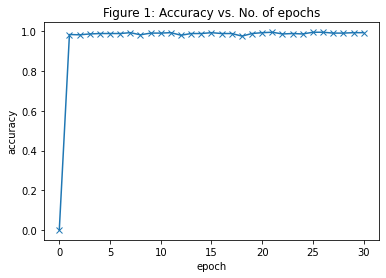

In [35]:
plot_accuracies(history)

In [36]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Figure 2: Loss vs. No. of epochs');

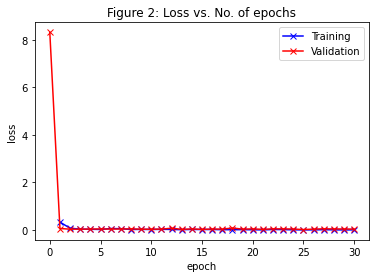

In [37]:
plot_losses(history)